<a href="https://colab.research.google.com/github/imran-ANU/labour_market/blob/main/EFTPOS_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Import EFTPOS Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving last_file.csv to last_file (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['last_file.csv']), names=['record', 'verified', 'reconciled','data','units_plan','unit','payer_name','item1','amount1','item2','amount2','item3','amount3','total','pay_to'],header=0)

In [ ]:
df

,record,verified,reconciled,data,units_plan,unit,payer_name,item1,amount1,item2,amount2,item3,amount3,total,pay_to
0,516.0,True,True,7/01/2020,4016,53/A,Kevin,Fob#3142,35.0,NaN,0.0,NaN,0.0,35.00,4016
1,517.0,True,True,10/01/2020,4082,20/3rd,Shane,Remote#00563,100.0,NaN,0.0,NaN,0.0,100.00,4082
2,518.0,True,True,7/01/2020,3704,300,Duong,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
3,519.0,True,True,10/01/2020,4077,19,McDonald & Williams,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
4,520.0,True,True,13/01/2020,4367,17,Connie,Swipe#069975,70.0,NaN,0.0,NaN,0.0,70.00,4367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1192.0,False,False,31/01/2022,1123,135,NaN,1x fob,30.0,NaN,0.0,NaN,0.0,30.00,1123
670,1193.0,False,False,31/01/2022,3089,716,NaN,1x air key,100.0,NaN,0.0,NaN,0.0,100.00,3089
671,1194.0,False,False,1/02/2022,1413,27,NaN,S119,300.0,NaN,0.0,NaN,0.0,300.00,BnD
672,1195.0,False,False,1/02/2022,1166,49,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD


Shape of the file

In [ ]:
df.shape

(674, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


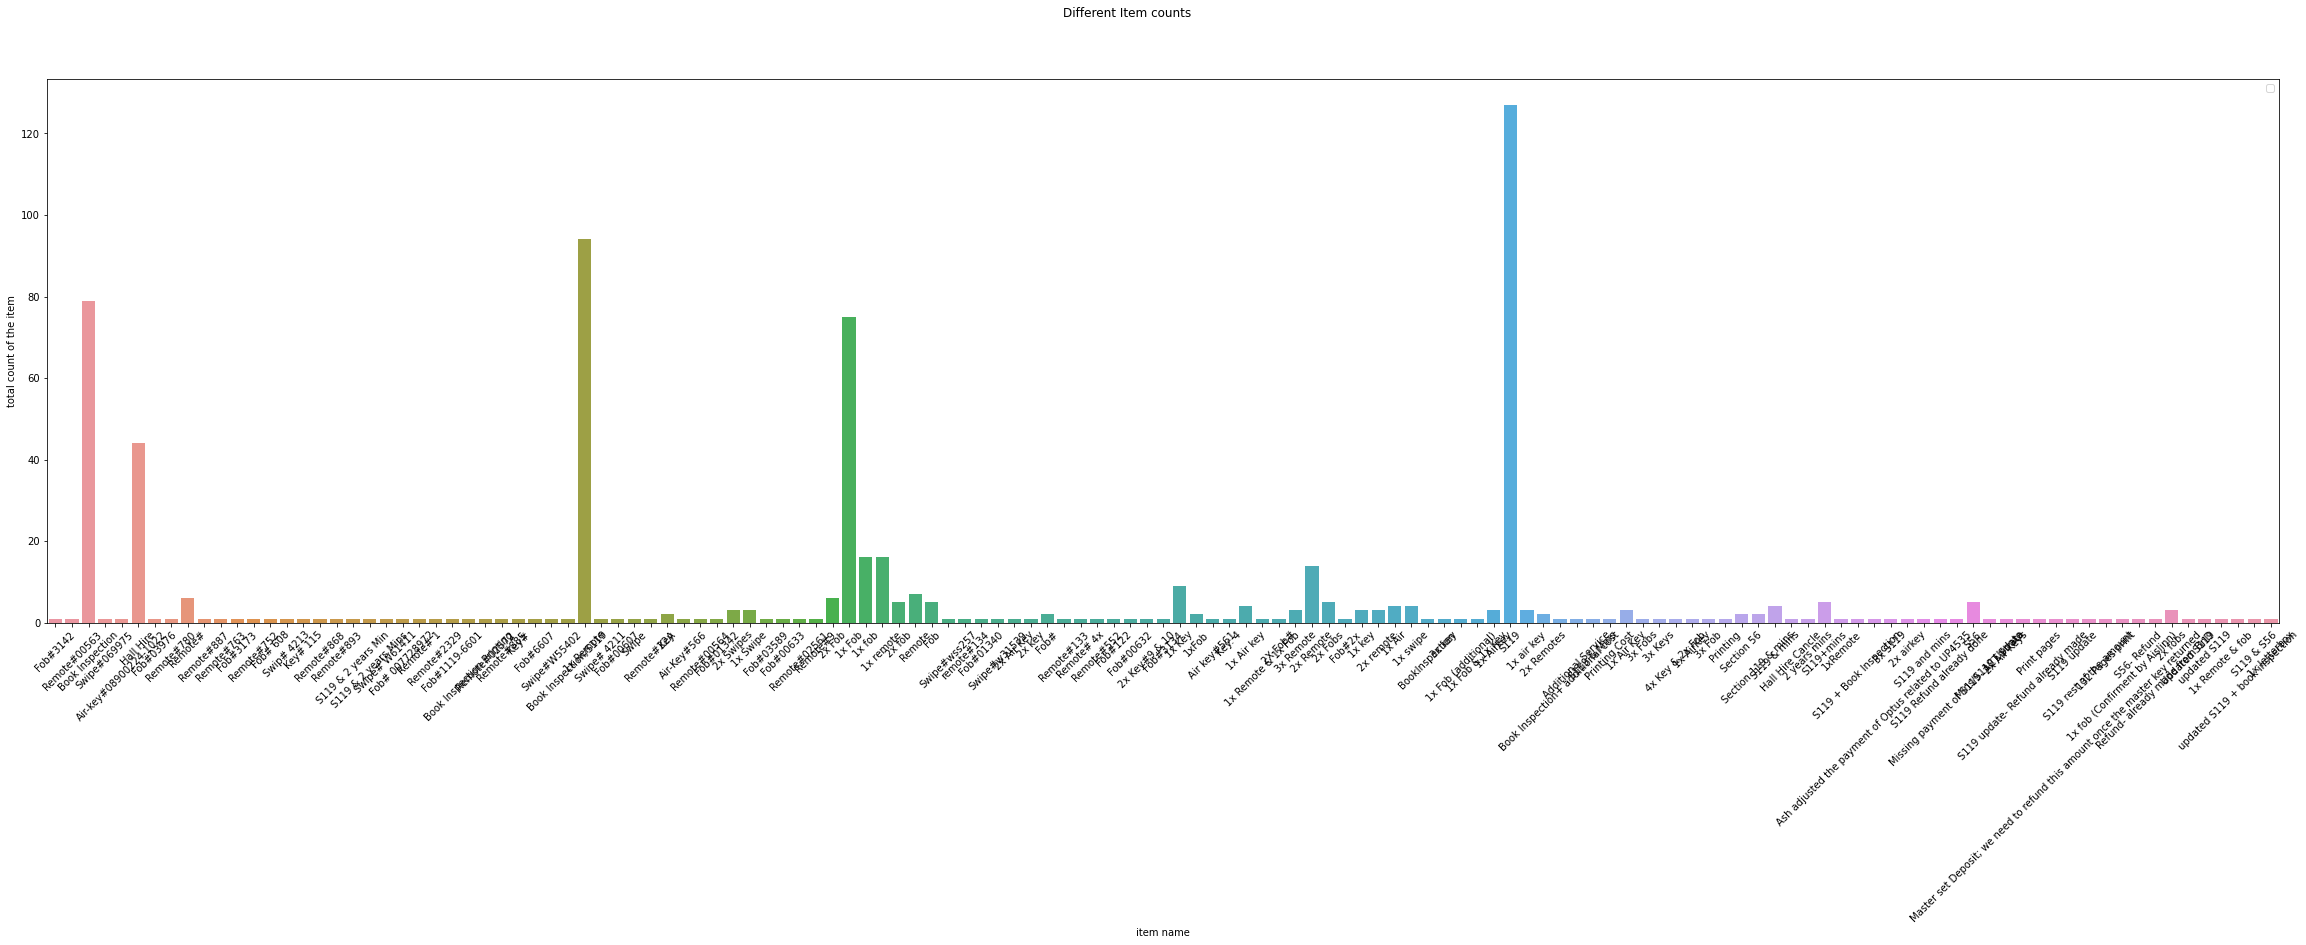

In [ ]:
fig = plt.figure(figsize=(40, 10))
fig.suptitle('Different Item counts')
sb.countplot(df.item1)
plt.xlabel('item name')
plt.ylabel('total count of the item')
leg = plt.legend();
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_S119 = df[df.item1.str.contains('119', case=False, regex= True, na=False)] # S119 data

In [ ]:
df_S119

,record,verified,reconciled,data,units_plan,unit,payer_name,item1,amount1,item2,amount2,item3,amount3,total,pay_to
24,540.0,True,True,7/02/2020,3428,4,NaN,S119 & 2 years Min,352.0,NaN,0.0,NaN,0.0,352.00,City Strata
26,542.0,True,True,10/02/2020,3428,11,NaN,S119 & 2 years Mins,352.0,NaN,0.0,NaN,0.0,352.00,City Strata
32,548.0,True,True,13/02/2020,3259,110,Dennise,Fob#1119-6601,100.0,NaN,0.0,NaN,0.0,100.00,3259
40,556.0,True,True,25/02/2020,4088,22,NaN,Book Inspection/S119,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
194,716.0,True,True,21/10/2020,2849,44,Lee,S119,114.0,NaN,0.0,NaN,0.0,114.00,Bright & Duggan (ACT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1179.0,False,False,27/01/2022,4199,5,NaN,S119,300.0,NaN,0.0,NaN,0.0,300.00,BnD
660,1183.0,False,False,28/01/2022,4535,215,NaN,S119,300.0,NaN,0.0,NaN,0.0,300.00,BnD
667,1190.0,False,False,31/01/2022,3872,63,NaN,S119,300.0,NaN,0.0,NaN,0.0,300.00,BnD
668,1191.0,False,False,31/01/2022,351,17,NaN,S119,300.0,NaN,0.0,NaN,0.0,300.00,BnD


In [ ]:
df_remaining = df.drop(df_S119.index)  # all data except S119

In [ ]:
df_remaining

,record,verified,reconciled,data,units_plan,unit,payer_name,item1,amount1,item2,amount2,item3,amount3,total,pay_to
0,516.0,True,True,7/01/2020,4016,53/A,Kevin,Fob#3142,35.0,NaN,0.0,NaN,0.0,35.00,4016
1,517.0,True,True,10/01/2020,4082,20/3rd,Shane,Remote#00563,100.0,NaN,0.0,NaN,0.0,100.00,4082
2,518.0,True,True,7/01/2020,3704,300,Duong,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
3,519.0,True,True,10/01/2020,4077,19,McDonald & Williams,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
4,520.0,True,True,13/01/2020,4367,17,Connie,Swipe#069975,70.0,NaN,0.0,NaN,0.0,70.00,4367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,1189.0,False,False,28/01/2022,1841,3,NaN,1x fob,50.0,NaN,0.0,NaN,0.0,50.00,1841
669,1192.0,False,False,31/01/2022,1123,135,NaN,1x fob,30.0,NaN,0.0,NaN,0.0,30.00,1123
670,1193.0,False,False,31/01/2022,3089,716,NaN,1x air key,100.0,NaN,0.0,NaN,0.0,100.00,3089
672,1195.0,False,False,1/02/2022,1166,49,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD


In [ ]:
df_book_inspection= df[df.item1.str.contains('book', case=False, regex= True, na=False)] # real book inspection data

In [ ]:
df_book_dummy= df_remaining[df_remaining.item1.str.contains('book', case=False, regex= True, na=False)]  # Dummay Book Inspection data

In [ ]:
df_book_inspection

,record,verified,reconciled,data,units_plan,unit,payer_name,item1,amount1,item2,amount2,item3,amount3,total,pay_to
2,518.0,True,True,7/01/2020,3704,300,Duong,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
3,519.0,True,True,10/01/2020,4077,19,McDonald & Williams,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
10,526.0,True,True,15/01/2020,3089,93,O'Malley,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
12,528.0,True,True,15/01/2020,59,15,Quirke,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
13,529.0,True,True,14/01/2020,351,27,Cameron,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1093.0,False,True,18/11/2021,2001,NaN,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD
579,1101.0,True,True,26/11/2021,3089,NaN,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,Bnd
603,1125.0,True,True,8/12/2021,4082,24,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD
614,1136.0,True,True,16/12/2021,3089,127,NaN,updated S119 + book inspection,264.0,NaN,0.0,NaN,0.0,264.00,BnD


In [ ]:
df_book_dummy

,record,verified,reconciled,data,units_plan,unit,payer_name,item1,amount1,item2,amount2,item3,amount3,total,pay_to
2,518.0,True,True,7/01/2020,3704,300,Duong,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
3,519.0,True,True,10/01/2020,4077,19,McDonald & Williams,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
10,526.0,True,True,15/01/2020,3089,93,O'Malley,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
12,528.0,True,True,15/01/2020,59,15,Quirke,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
13,529.0,True,True,14/01/2020,351,27,Cameron,Book Inspection,112.0,NaN,0.0,NaN,0.0,112.00,City Strata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,1079.0,True,True,12/11/2021,3872,66,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD
571,1093.0,False,True,18/11/2021,2001,NaN,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD
579,1101.0,True,True,26/11/2021,3089,NaN,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,Bnd
603,1125.0,True,True,8/12/2021,4082,24,NaN,Book Inspection,114.0,NaN,0.0,NaN,0.0,114.00,BnD


In [ ]:
df_other= df_remaining.drop(df_book_dummy.index)  # other data except S119 and Book Inspection

In [ ]:
df_other

,record,verified,reconciled,data,units_plan,unit,payer_name,item1,amount1,item2,amount2,item3,amount3,total,pay_to
0,516.0,True,True,7/01/2020,4016,53/A,Kevin,Fob#3142,35.0,NaN,0.0,NaN,0.0,35.00,4016
1,517.0,True,True,10/01/2020,4082,20/3rd,Shane,Remote#00563,100.0,NaN,0.0,NaN,0.0,100.00,4082
4,520.0,True,True,13/01/2020,4367,17,Connie,Swipe#069975,70.0,NaN,0.0,NaN,0.0,70.00,4367
5,521.0,True,True,10/01/2020,3089,911,Thomas,Air-key#08900224-1022,100.0,NaN,0.0,NaN,0.0,100.00,3089
6,522.0,True,True,13/01/2020,10,NaN,NaN,Hall Hire,75.0,NaN,0.0,NaN,0.0,75.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,1188.0,False,False,28/01/2022,3259,206,NaN,1x remote,127.6,1x fob,61.6,NaN,0.0,189.20,3259
666,1189.0,False,False,28/01/2022,1841,3,NaN,1x fob,50.0,NaN,0.0,NaN,0.0,50.00,1841
669,1192.0,False,False,31/01/2022,1123,135,NaN,1x fob,30.0,NaN,0.0,NaN,0.0,30.00,1123
670,1193.0,False,False,31/01/2022,3089,716,NaN,1x air key,100.0,NaN,0.0,NaN,0.0,100.00,3089


No handles with labels found to put in legend.


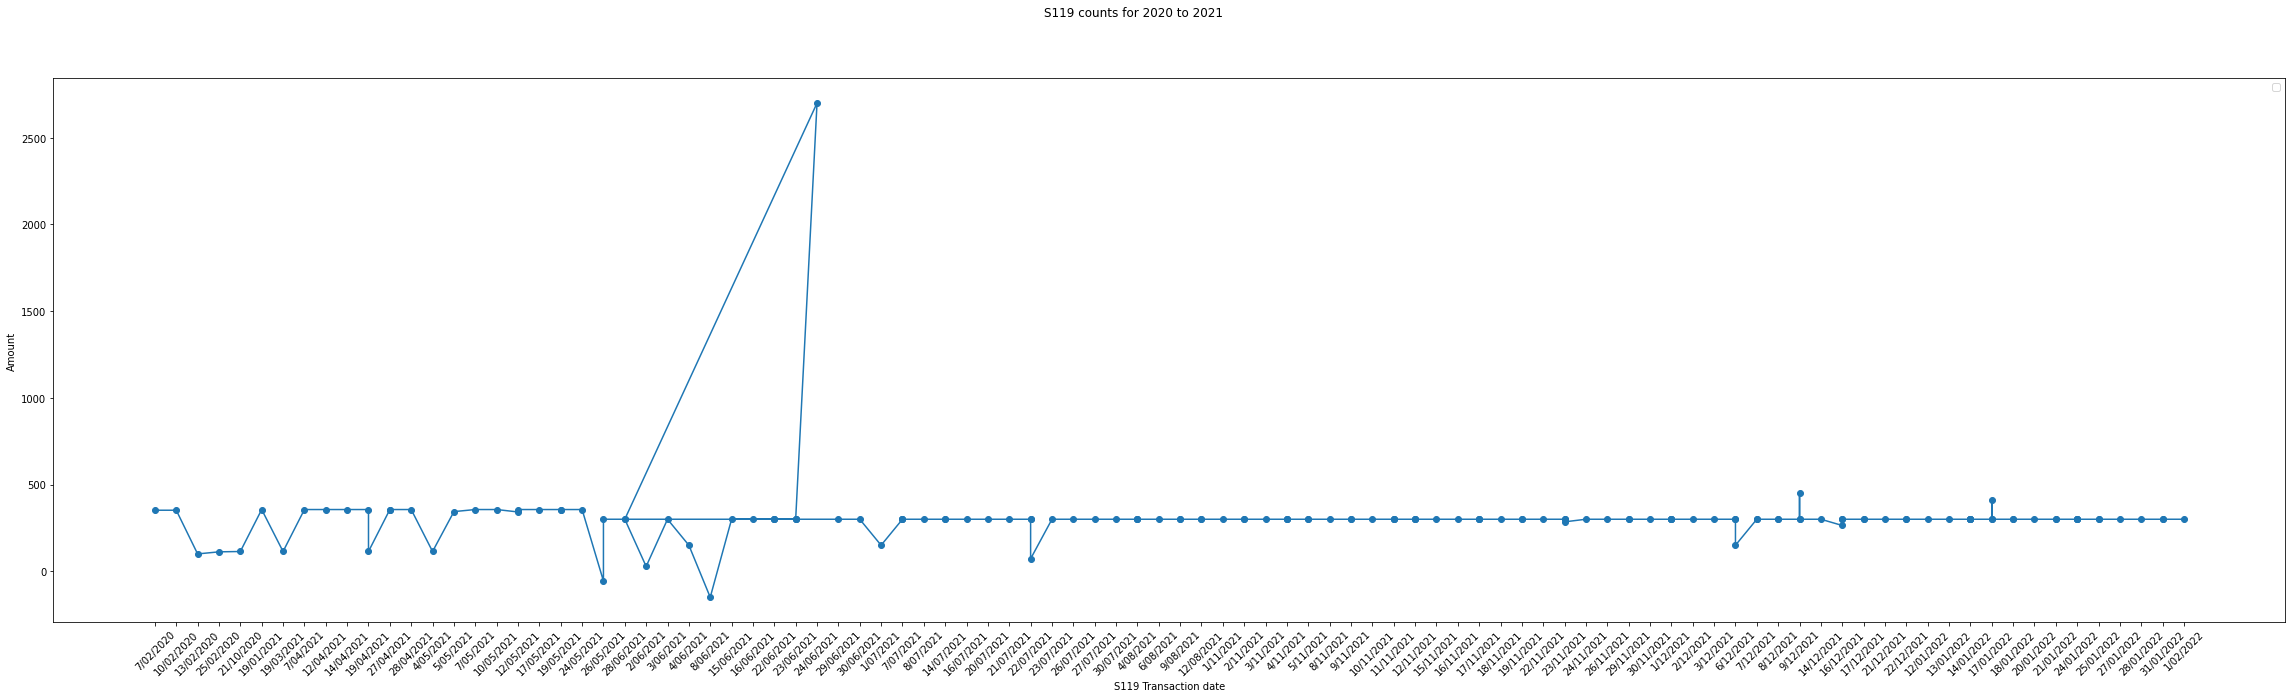

In [ ]:
fig = plt.figure(figsize=(40, 10))
fig.suptitle('S119 counts for 2020 to 2021')
plt.plot(df_S119['data'],df_S119['amount1'],marker="o",)
plt.xlabel('S119 Transaction date')
plt.ylabel('Amount')
leg = plt.legend();
plt.xticks(rotation=45)
plt.show()

In [ ]:
S_amount = df_S119.amount1.sum() # S119 analysis
length = len(df.index)
average_S119 = S_amount/length
print(S_amount)
print(average_S119)

47551.0
70.55044510385757


In [ ]:
B_amount = df_book_inspection.amount1.sum() # Book Inspection analysis
length = len(df.index)
average_Book_inspection = B_amount/length
print(B_amount)
print(average_Book_inspection)

9958.8
14.775667655786348


In [ ]:
O_amount1 = df_other.amount1.sum() # Other (fob, remote, hall hire, key) analysis
O_amount2 = df_other.amount2.sum()
length = len(df.index)
O_amount = O_amount1 + O_amount2
average_other = O_amount/length
print(O_amount)
print(average_other)

42565.18
63.153086053412466


***S119, Book Inspection, Other Analysis for 2020 to 2021***

In [5]:
#119 Ananlysis for 2020 to 2021
# total amount earned                                                 = $47551.0
# Average money earned Per business transaction                       = $70.55 
# Total S119 term count   (around)                                    = 156

#Book Inspection Ananlysis for 2020 to 2021
# total amount earned                                                 = $9958.80
# Average money earned Per business transaction                       = $14.77 
# Total Book Inspection term count (around)                           = 85

#Other Ananlysis for 2020 to 2021
# total amount given to UP                                            = $42565.18
# Average money earned Per business transaction                       = $63.15 
# Total other (fob, key, hall hire, remote etc) term count  (around)  = 436
